In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore') 
warnings.warn('') 

In [2]:
csv_file = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
initial_dataframe = pd.DataFrame(csv_file)
initial_dataframe

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
initial_dataframe.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [4]:
initial_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
initial_dataframe.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [6]:
numerical_df = initial_dataframe[['age','resting bp s','cholesterol','max heart rate','oldpeak']]
categorial_df = initial_dataframe[['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']]

# Plottong Functions : 

In [7]:
def plotting(data,subdata,data_type): 
   
    if data_type == 'categorial':
        
        fig,axes = plt.subplots(2,3,figsize = (20,20))
    
        for i,axes in enumerate(axes.flatten()):
    
            sns.countplot(x=subdata.columns[i],data=data,ax=axes)
    
    elif data_type == 'numerical' : 

        fig,axes = plt.subplots(2,3,figsize = (20,20))
    
        for i,axes in enumerate(axes.flatten()):
    
            if i <= 4 :
    
                sns.boxplot(x=subdata.columns[i],data=data,ax=axes)

    elif data_type == 'correlation' : 

        plt.figure(figsize=(10,10))
    
        plt.title('Correlation Matrix')
    
        plt.xticks(fontsize = 10)
    
        plt.yticks(fontsize = 10)
    
        sns.heatmap(data=data.corr(),cmap='Reds',annot=True,linewidths=2)


    elif data_type == 'target-evaluation':
        for i in numerical_df.columns : 
            title = i +' ' + 'vs' +' ' + 'target'
            x_label = i
            y_label = 'target'
            plt.figure(figsize=(15,8))
            plt.scatter(x=numerical_df[i],y=data['target'])
            plt.xlabel(x_label)
            plt.ylabel(y_label)
            plt.title(title)

        
                    

# model Functions : 

In [8]:
def model_application(X,Y,model):
    
    test_size = [0.1,0.15,0.2,0.25]
    initial_accuracy = 0

    for i in test_size :
        
        X_train,X_test,Y_train,Y_test = train_test_split(X,Y.ravel(),test_size=i,random_state=0)

        model.fit(X_train,Y_train)

        Y_prediction = model.predict(X_test)

        final_accuracy = accuracy_score(Y_test,Y_prediction)

        if final_accuracy > initial_accuracy : 

            print(f'The model accuracy is equal to {final_accuracy*100}% for test size {i}, that in bigger than the initial accuracy that was {initial_accuracy}%\n')

            print('----------------------------------------------------------------------------------------------------------------------------------------------\n')

            initial_accuracy = final_accuracy

            final_model = model

            best_test_size = i

            final_Y_test = Y_test

            final_Y_prediction = Y_prediction

            final_X_train = X_train

            final_Y_train = Y_train

        else: 

            print(f'The model accuracy is equal to {final_accuracy*100}% for test size {i}, that in smaller than the initial accuracy that was {initial_accuracy*100}%\n')

            print('----------------------------------------------------------------------------------------------------------------------------------------------\n')  

    print(f'The final accuracy fo our model is equal to {initial_accuracy} for the test size {best_test_size}')    
    
    return model,final_Y_test,final_Y_prediction,final_X_train,final_Y_train





def knn(X,Y,k) : 

    Training_acc_list = []

    test_acc_list = []


    initial_accuracy = 0

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15,random_state=0)

    k_values = [i for i in range(3,k,2)]

    for k in k_values : 
        
        model = KNeighborsClassifier(n_neighbors=k)
        
        model.fit(X_train,Y_train.ravel())

        Y_prediction = model.predict(X_test)

        final_accuracy = accuracy_score(Y_test,Y_prediction)

        Training_acc_list.append(model.score(X_train,Y_train))
        
        test_acc_list.append(model.score(X_test,Y_test))

        if final_accuracy > initial_accuracy : 

            print(f'The model accuracy is equal to {final_accuracy*100}% for K equal to {k}, that in bigger than the initial accuracy that was {initial_accuracy}%\n')

            print('----------------------------------------------------------------------------------------------------------------------------------------------\n')

            initial_accuracy = final_accuracy
            
            final_model = model

            final_k = k
            
            final_X_train,final_X_test,final_Y_train,final_Y_test,final_Y_prediction = X_train,X_test,Y_train,Y_test,Y_prediction

        else : 

            print(f'The model accuracy is equal to {final_accuracy*100}% for K equal to {k}, that in smaller than the initial accuracy that was {initial_accuracy}%\n')

            print('----------------------------------------------------------------------------------------------------------------------------------------------\n')

    print(f'The final accuracy fo our model is equal to {initial_accuracy} for the K :  {final_k}')

    plt.plot(k_values,Training_acc_list,label = 'Accuracy of training set')

    plt.plot(k_values,test_acc_list,label = 'Acuuracy of test set')

    plt.xlabel('Number of the neighbours')

    plt.ylabel('Accuracy')

    plt.xticks(ticks=k_values)

    plt.grid()

    plt.legend()

    return model,final_k,final_X_train,final_X_test,final_Y_train,final_Y_test,final_Y_prediction   

        

def improved_logestic_model(X,Y):

    initial_accuracy_score = 0
    
    scaler = StandardScaler()
    
    X_scaled = scaler.fit_transform(X)
    
    X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y.ravel(),test_size=0.15,random_state=0)
    
    solver = ['saga','sag','newton-cholesky','newton-cg','liblinear','lbfgs']
    
    c_value = [0.1,0.05,0.01,0.001,0.0001]
    
    max_iter = 10000
    
    for i in range(0,len(solver)) : 
    
        accuracy_list = {}
    
        for j in range(0,len(c_value)):
    
            model = LogisticRegression(solver=solver[i],C=c_value[j],max_iter=max_iter)
    
            model.fit(X_train,Y_train)
    
            Y_prediction = model.predict(X_test)
    
            final_accuracy_score = accuracy_score(Y_test,Y_prediction)
    
            accuracy_list[(solver[i],c_value[j])] = final_accuracy_score
    
            if final_accuracy_score > initial_accuracy_score : 
               
                initial_accuracy_score = final_accuracy_score
    
                final_model_name = solver[i]
    
                final_c_value = c_value[j]
    
                final_model = model
    
                final_Y_test = Y_test
    
                final_Y_prediction = Y_prediction

        print(f'The accuracy score for the solver "{list(accuracy_list.keys())[0][0]}" : \n ')
    
        for key,value in accuracy_list.items() :
            
            print(f'for the c = {key[1]} : the accuracy is equal to : {value}')
    
        print('--------------------------------------------------------------------------------------------------------------------------------------------------------')
    
        accuracy_list = {}
    
    print(f'The best result is for {final_model_name} solver with the c_value equal to : {final_c_value} and the accuracy score equal to : {initial_accuracy_score}')
    
    return final_model,final_Y_test,final_Y_prediction

# Evaluation Functions : 

In [9]:
def confusion_evaluation(Y_test,Y_prediction): 
    
    result_confusion = confusion_matrix(Y_test,Y_prediction)

    result_classification = classification_report(Y_test,Y_prediction)

    print(result_confusion,'\n------------------------------------------------------------------------------------\n')

    print(result_classification,'\n-------------------------------------------------------------------------------\n')

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in result_confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in result_confusion.flatten()/np.sum(result_confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    heatmap = sns.heatmap(result_confusion, annot=labels, fmt='', cmap='Blues')
    heatmap.set_xlabel("Prediction")
    heatmap.set_ylabel('True')


def folds_evaluation(X,Y,folds_number):
    
    
    kf = KFold(n_splits=folds_number,shuffle=False,random_state=None)
    
    cv = cross_val_score(estimator=model,X=X_train,y=Y_train,cv=kf)
    
    for i in range(0,len(cv)) :
        
    
        print(f'The Accuracy for the fold {i+1} is equal to : {cv[i]}\n------------------------------------------------------------------------------')
    
    print(f'The average of the accuracy is equal to {np.average(cv)}')
    
    print(f'The number of the data in each fold is equal to {int(len(X_train)/folds_number)}')    

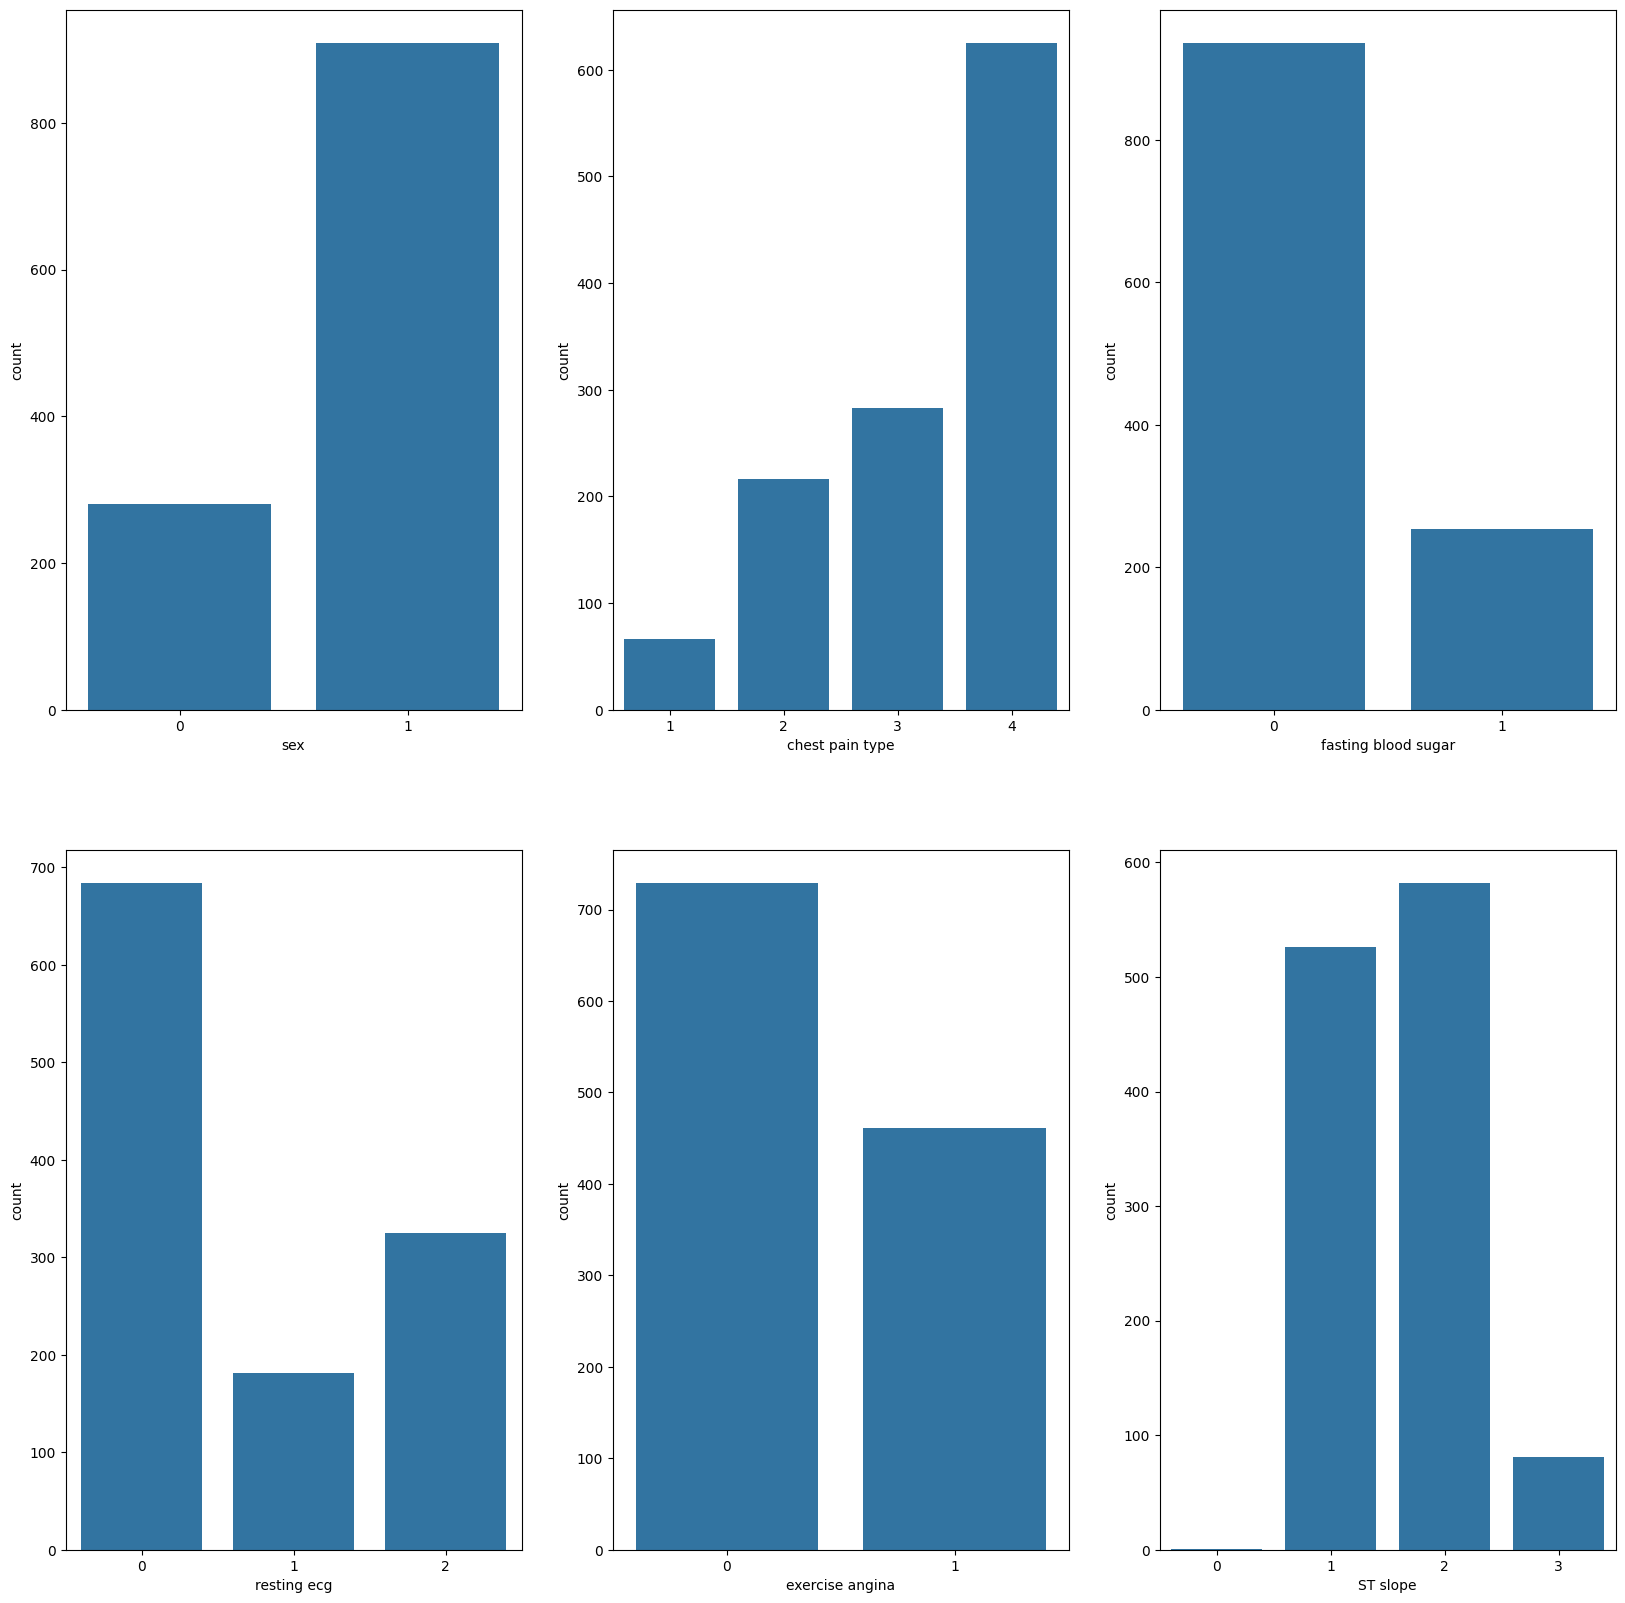

In [10]:
plotting(initial_dataframe,subdata=categorial_df,data_type='categorial')

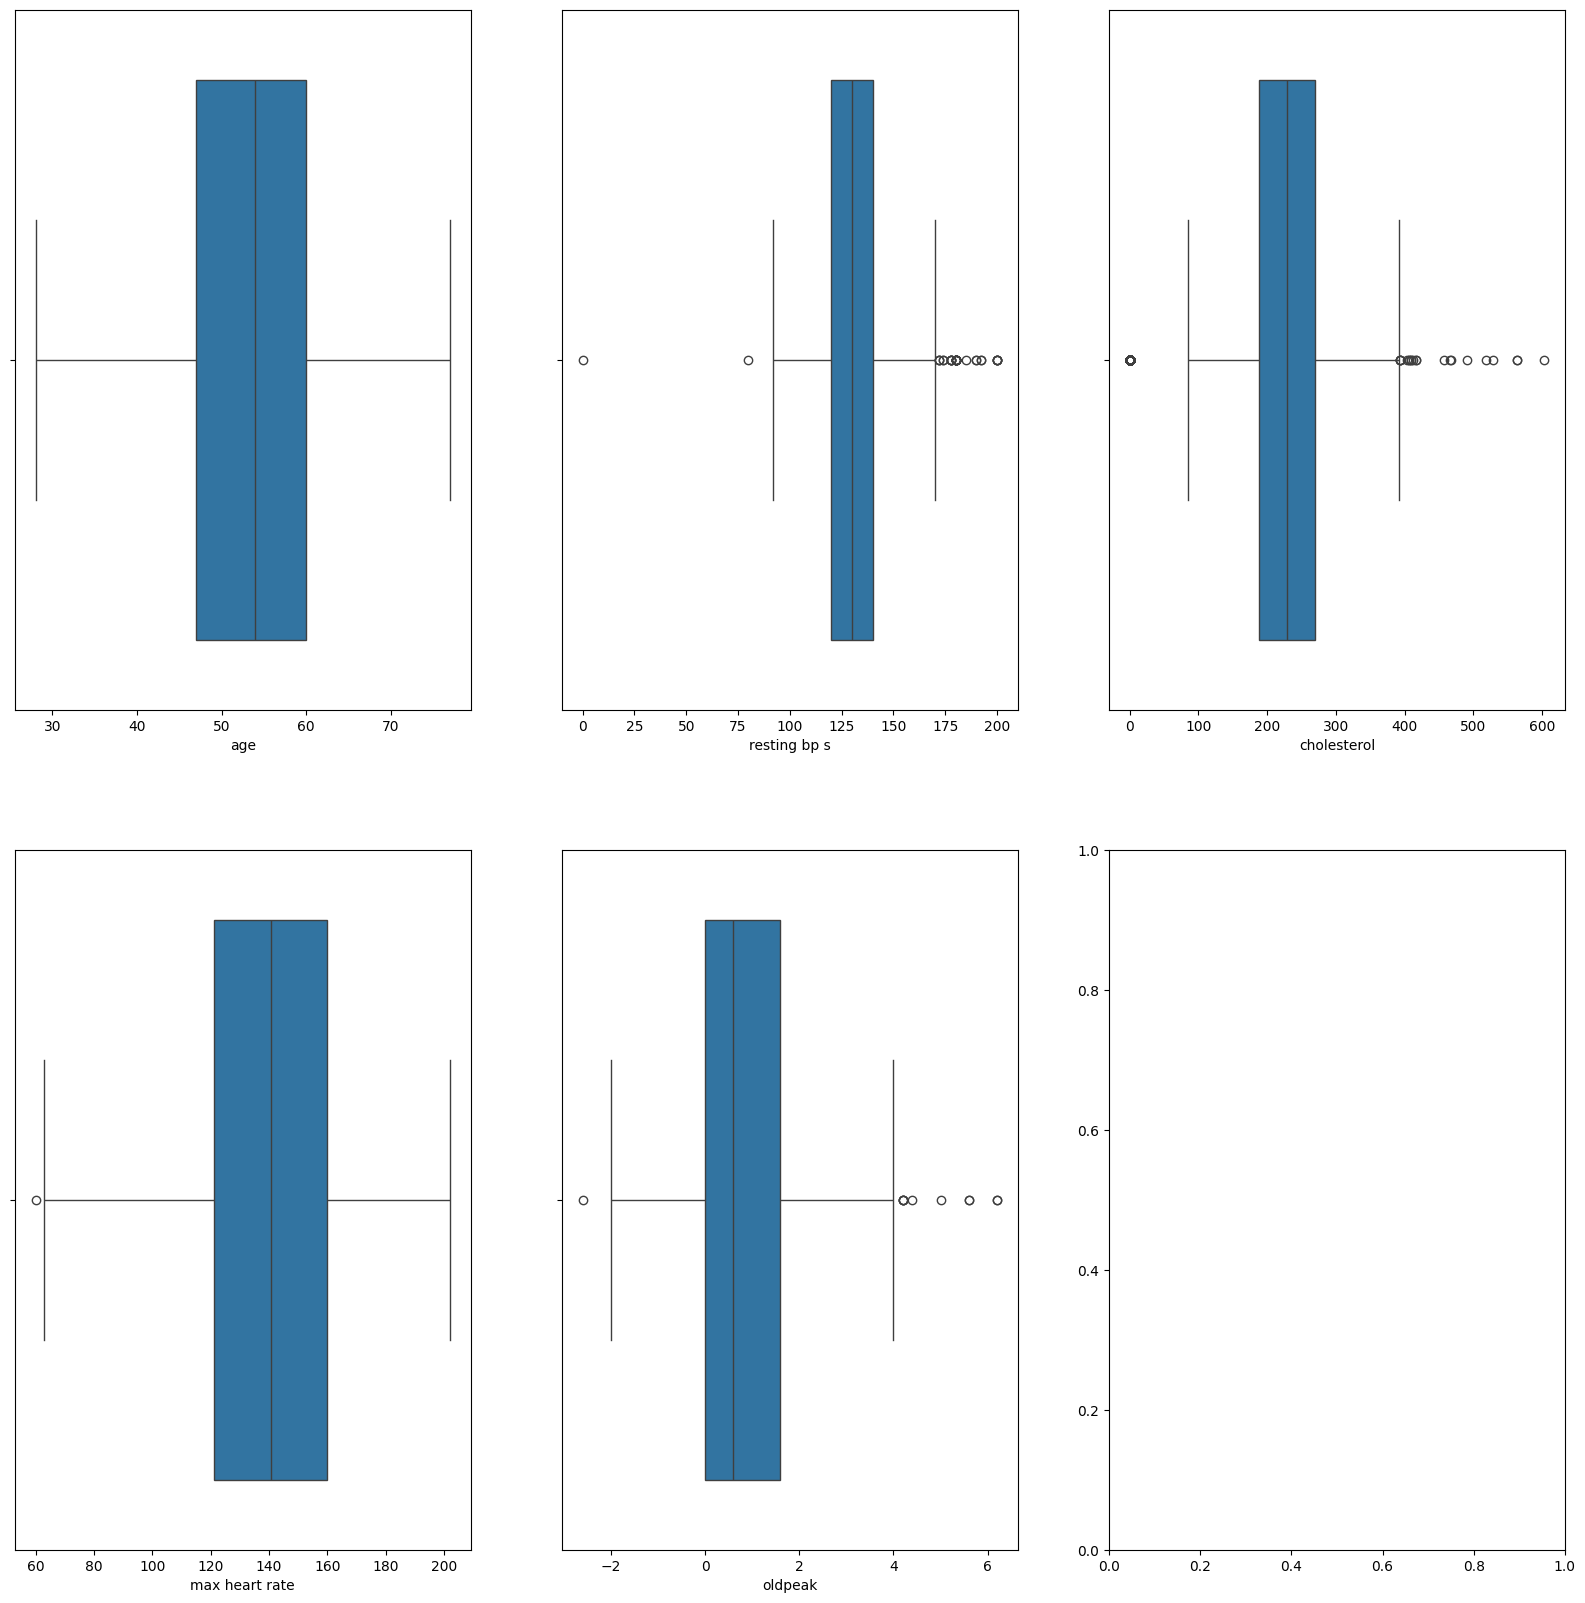

In [11]:
plotting(data=initial_dataframe,subdata=numerical_df,data_type='numerical')

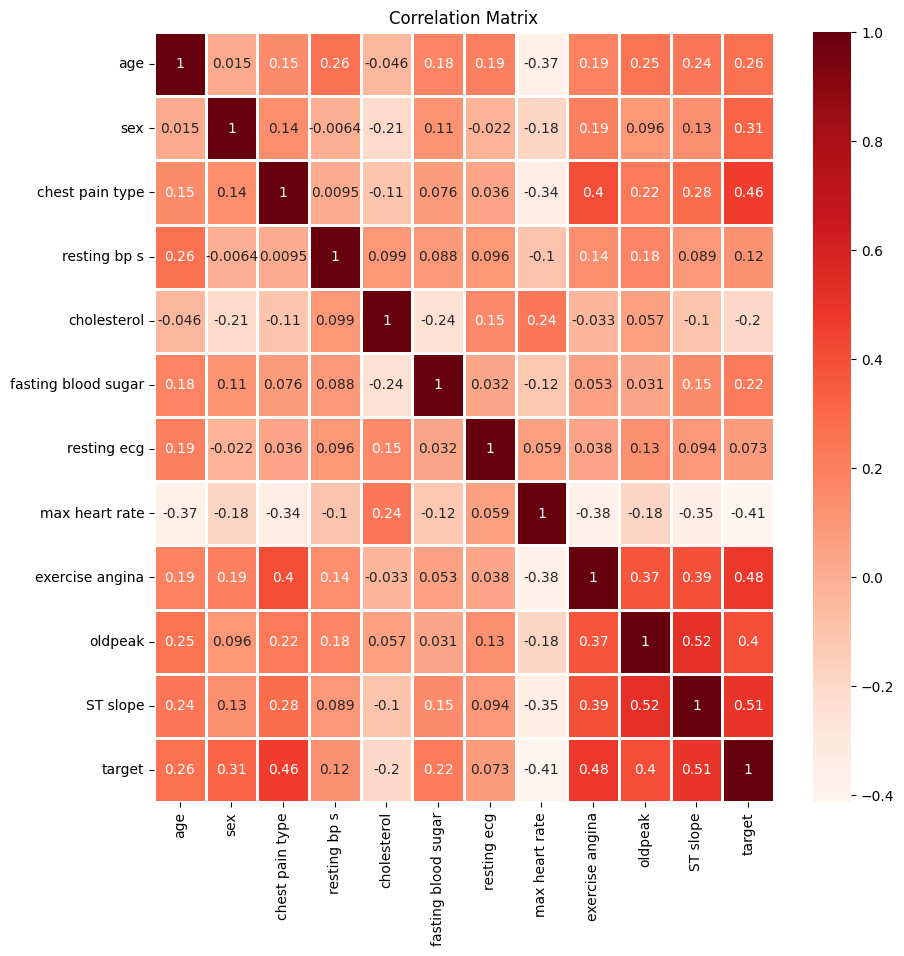

In [12]:
plotting(data=initial_dataframe,subdata=None,data_type='correlation')

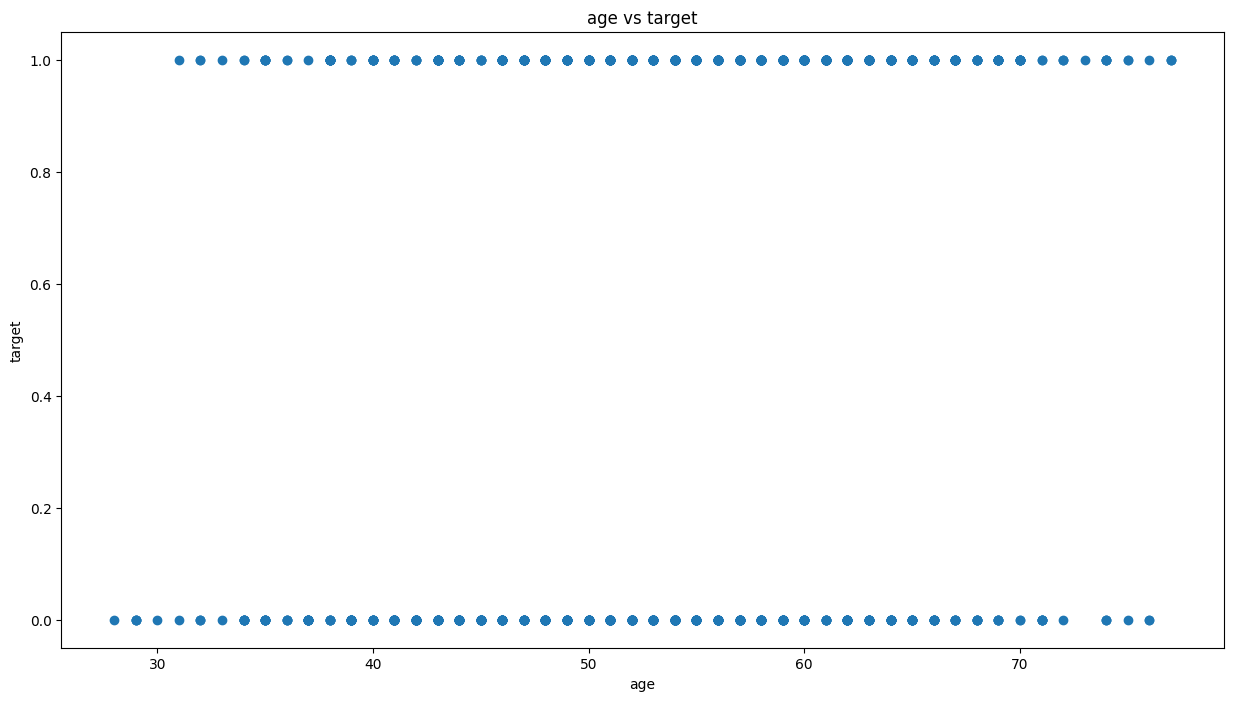

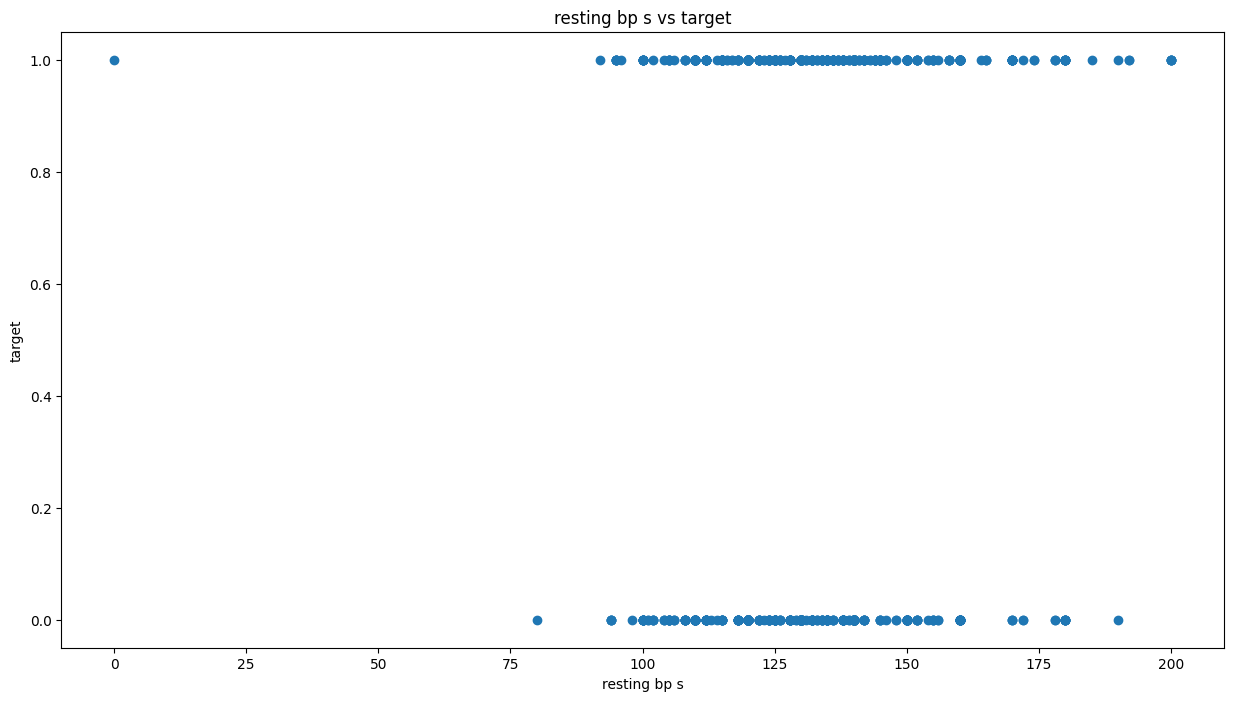

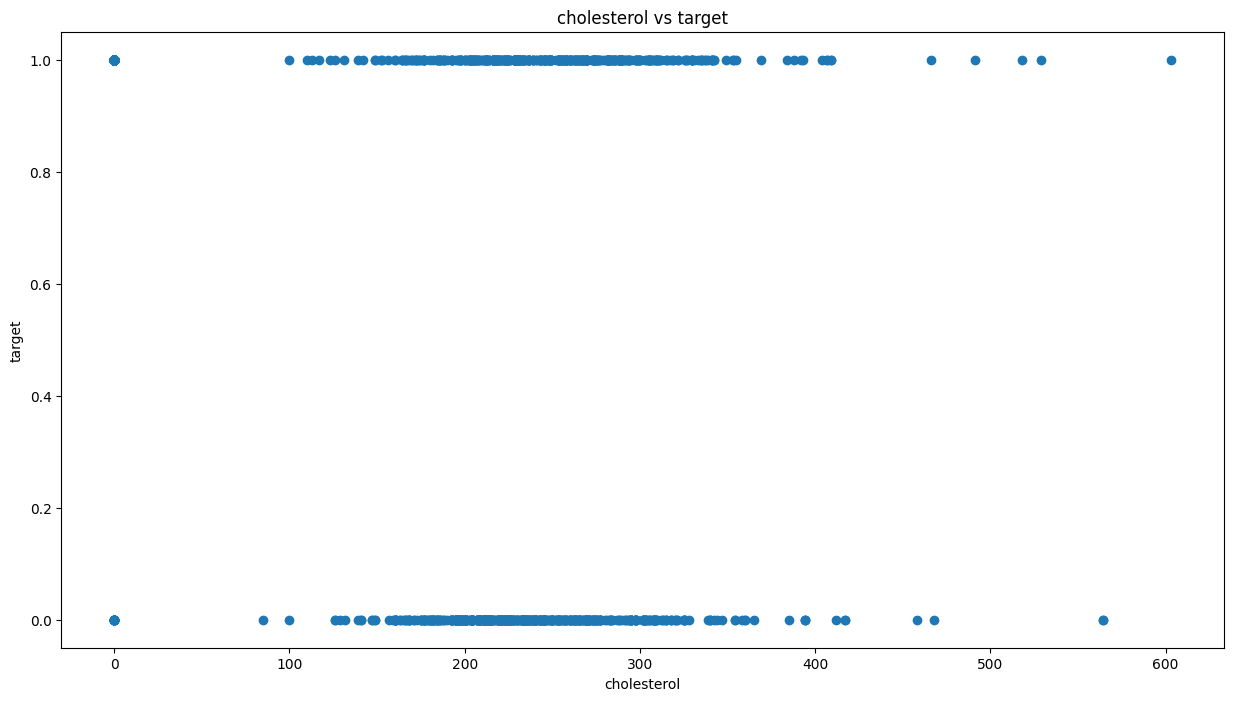

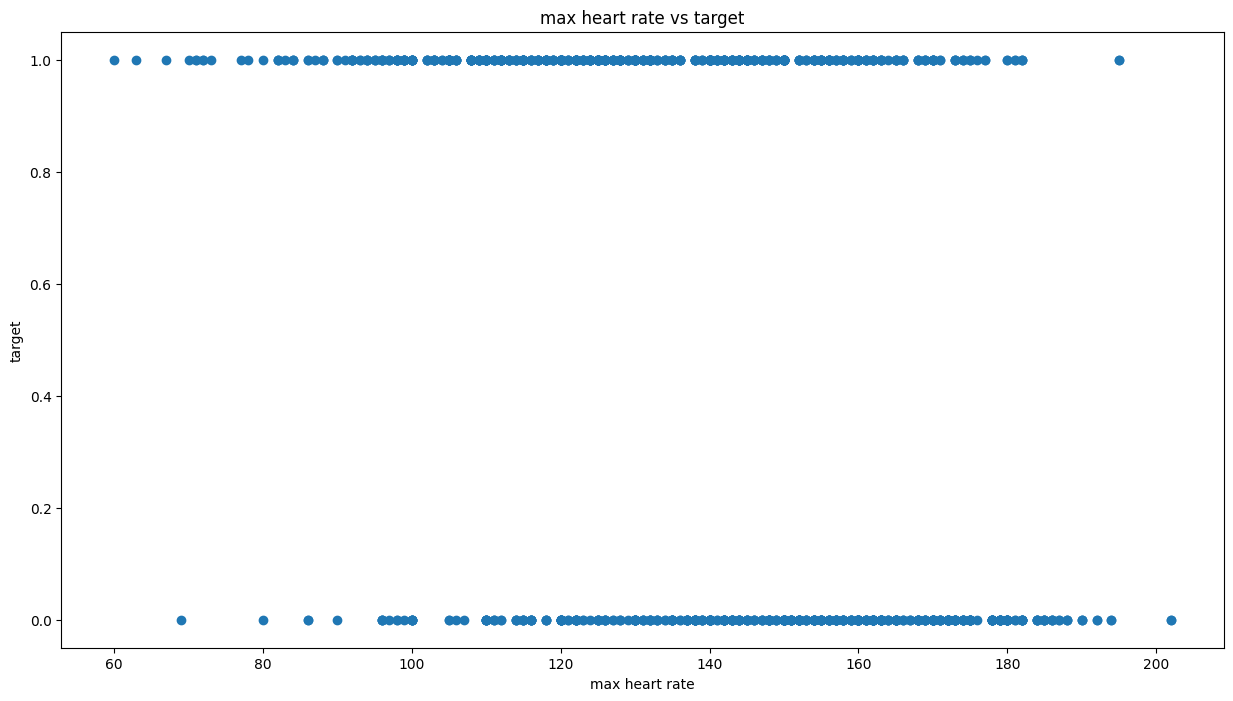

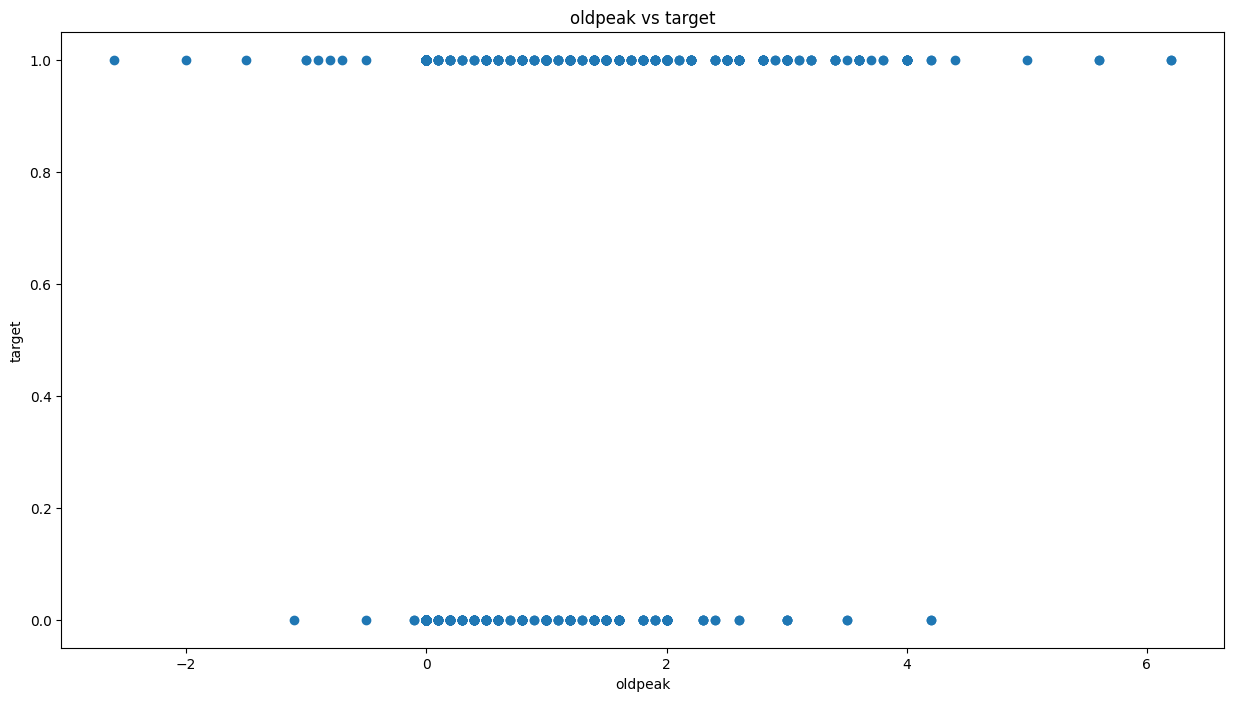

In [13]:
plotting(data=initial_dataframe,subdata=numerical_df,data_type='target-evaluation')

In [14]:
noise_1 = initial_dataframe[initial_dataframe['cholesterol']==0].index
print(noise_1)

Index([294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
       ...
       482, 484, 485, 493, 509, 515, 516, 519, 536, 537],
      dtype='int64', length=172)


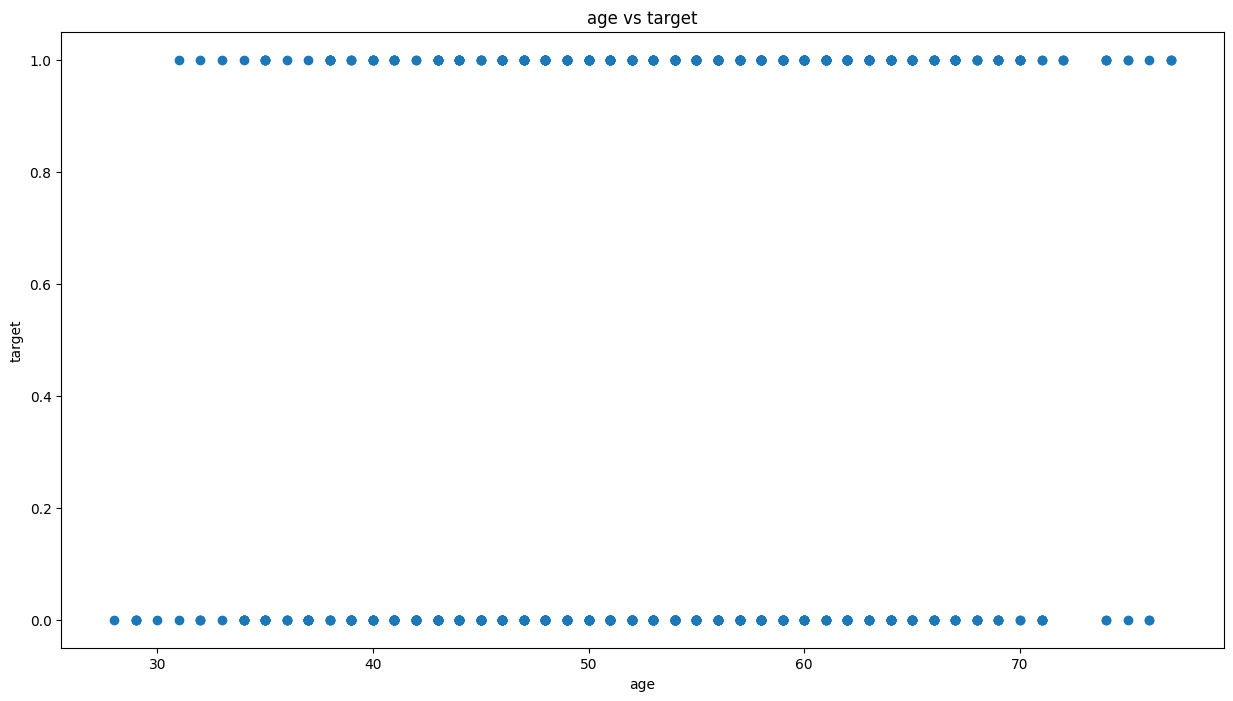

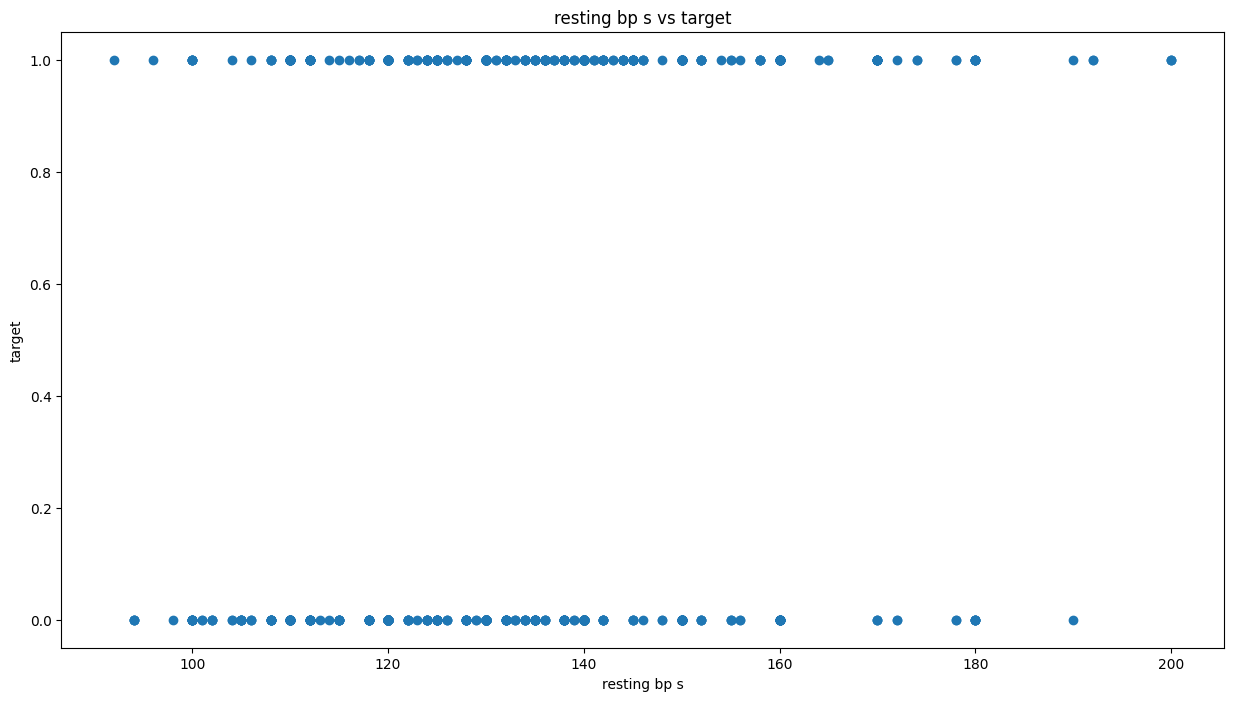

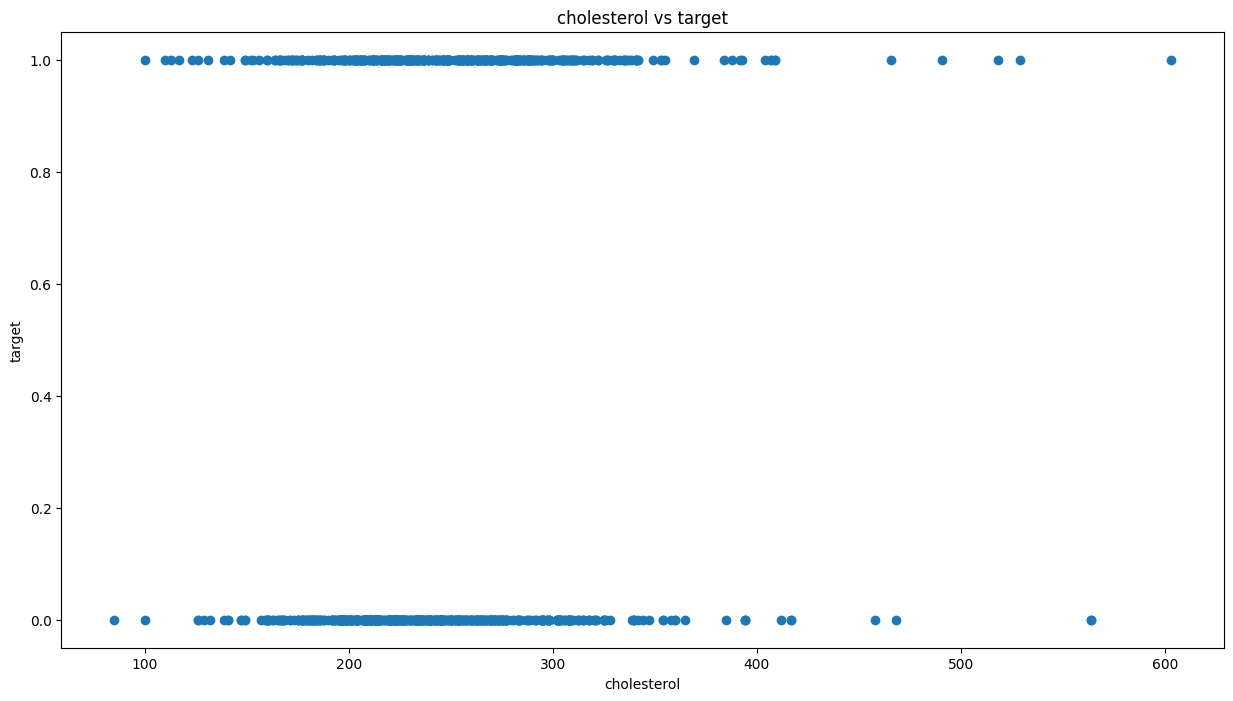

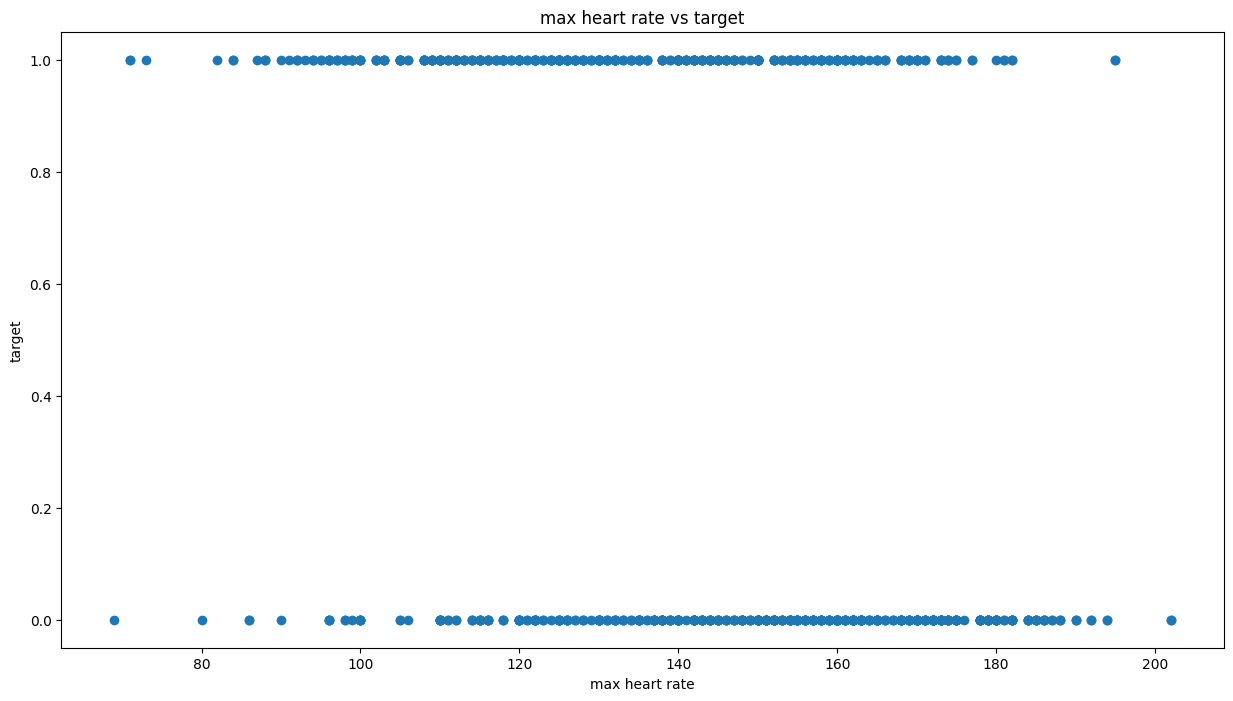

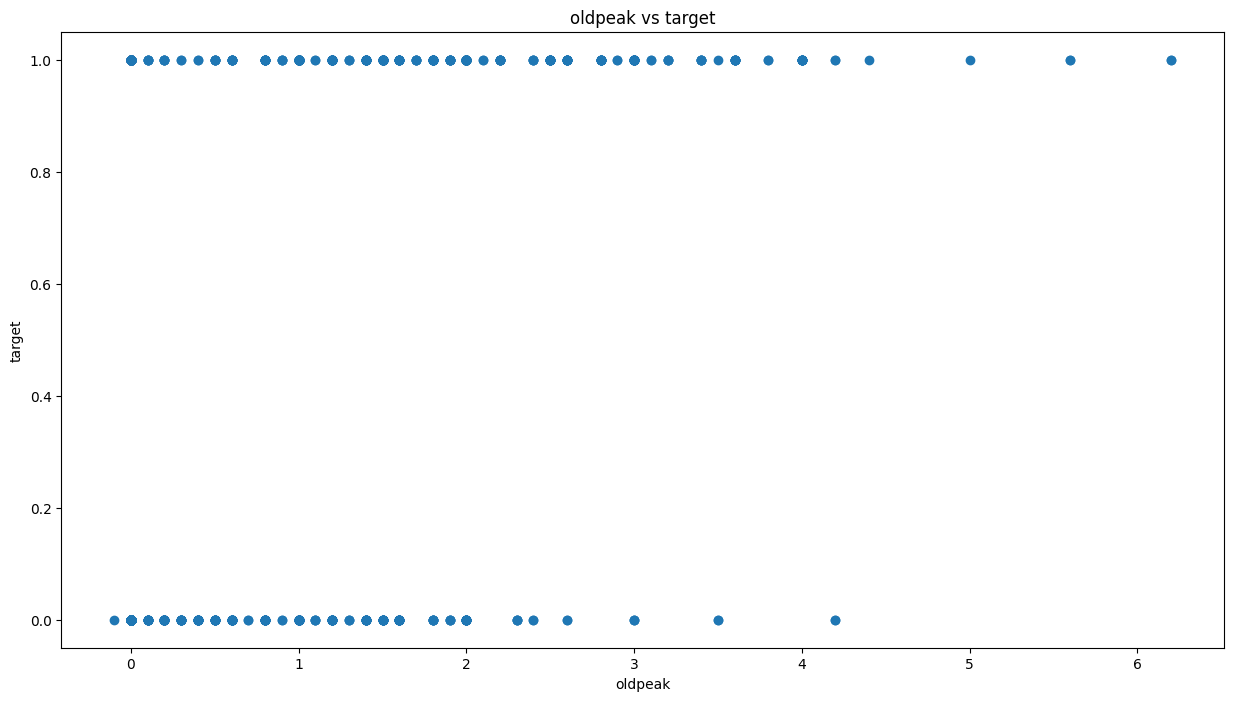

In [15]:
initial_dataframe.drop(axis=0,index=noise_1,inplace=True)
numerical_df.drop(axis=0,index=noise_1,inplace=True)
plotting(data=initial_dataframe,subdata=numerical_df,data_type='target-evaluation')

In [16]:
X = initial_dataframe[['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
                        'fasting blood sugar', 'resting ecg', 'max heart rate',
                        'exercise angina', 'oldpeak', 'ST slope']]

Y = initial_dataframe['target'].values.reshape(-1,1)

# Logestic Regression : 

In [17]:
model,Y_test,Y_prediction,X_train,Y_train =  model_application(X=X,Y=Y,model=LogisticRegression())

The model accuracy is equal to 82.35294117647058% for test size 0.1, that in bigger than the initial accuracy that was 0%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 83.66013071895425% for test size 0.15, that in bigger than the initial accuracy that was 0.8235294117647058%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 80.3921568627451% for test size 0.2, that in smaller than the initial accuracy that was 83.66013071895425%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 79.6078431372549% for test size 0.25, that in smaller than the initial accuracy that was 83.66013071895425%

-------------------------

[[63 11]
 [14 65]] 
------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.82      0.85      0.83        74
           1       0.86      0.82      0.84        79

    accuracy                           0.84       153
   macro avg       0.84      0.84      0.84       153
weighted avg       0.84      0.84      0.84       153
 
-------------------------------------------------------------------------------



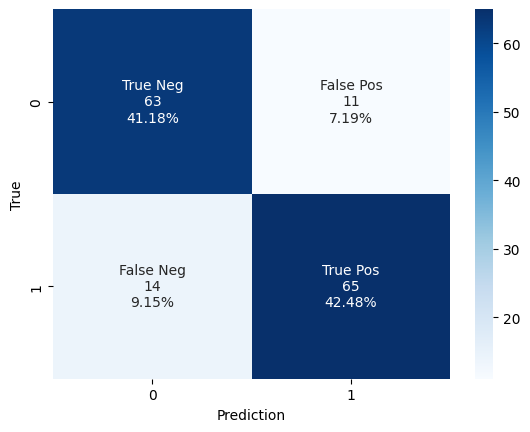

In [18]:
confusion_evaluation(Y_test,Y_prediction)

In [19]:
folds_evaluation(X=X_train,Y=Y_train,folds_number=20)

The Accuracy for the fold 1 is equal to : 0.7727272727272727
------------------------------------------------------------------------------
The Accuracy for the fold 2 is equal to : 0.7272727272727273
------------------------------------------------------------------------------
The Accuracy for the fold 3 is equal to : 0.8181818181818182
------------------------------------------------------------------------------
The Accuracy for the fold 4 is equal to : 0.75
------------------------------------------------------------------------------
The Accuracy for the fold 5 is equal to : 0.8409090909090909
------------------------------------------------------------------------------
The Accuracy for the fold 6 is equal to : 0.8604651162790697
------------------------------------------------------------------------------
The Accuracy for the fold 7 is equal to : 0.8372093023255814
------------------------------------------------------------------------------
The Accuracy for the fold 8 is equ

# Naive_Bayes : 

In [20]:
model,Y_test,Y_prediction,X_train,Y_train = model_application(X=X,Y=Y,model=GaussianNB())

The model accuracy is equal to 83.33333333333334% for test size 0.1, that in bigger than the initial accuracy that was 0%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 87.58169934640523% for test size 0.15, that in bigger than the initial accuracy that was 0.8333333333333334%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 87.25490196078431% for test size 0.2, that in smaller than the initial accuracy that was 87.58169934640523%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 85.88235294117646% for test size 0.25, that in smaller than the initial accuracy that was 87.58169934640523%

-----------------------

[[65  9]
 [10 69]] 
------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        74
           1       0.88      0.87      0.88        79

    accuracy                           0.88       153
   macro avg       0.88      0.88      0.88       153
weighted avg       0.88      0.88      0.88       153
 
-------------------------------------------------------------------------------



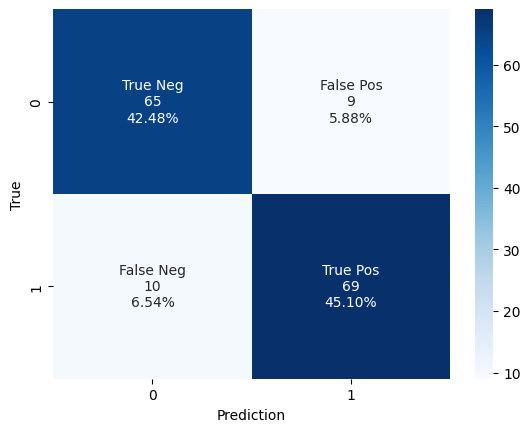

In [21]:
confusion_evaluation(Y_test=Y_test,Y_prediction=Y_prediction)

In [22]:
folds_evaluation(X=X_train,Y=Y_train,folds_number=10)

The Accuracy for the fold 1 is equal to : 0.8275862068965517
------------------------------------------------------------------------------
The Accuracy for the fold 2 is equal to : 0.7931034482758621
------------------------------------------------------------------------------
The Accuracy for the fold 3 is equal to : 0.8505747126436781
------------------------------------------------------------------------------
The Accuracy for the fold 4 is equal to : 0.8505747126436781
------------------------------------------------------------------------------
The Accuracy for the fold 5 is equal to : 0.735632183908046
------------------------------------------------------------------------------
The Accuracy for the fold 6 is equal to : 0.813953488372093
------------------------------------------------------------------------------
The Accuracy for the fold 7 is equal to : 0.7674418604651163
------------------------------------------------------------------------------
The Accuracy for the f

# KNN : 

The model accuracy is equal to 66.01307189542483% for K equal to 3, that in bigger than the initial accuracy that was 0%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 66.66666666666666% for K equal to 5, that in bigger than the initial accuracy that was 0.6601307189542484%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 70.58823529411765% for K equal to 7, that in bigger than the initial accuracy that was 0.6666666666666666%

----------------------------------------------------------------------------------------------------------------------------------------------

The model accuracy is equal to 67.97385620915033% for K equal to 9, that in smaller than the initial accuracy that was 0.7058823529411765%

----------------------------

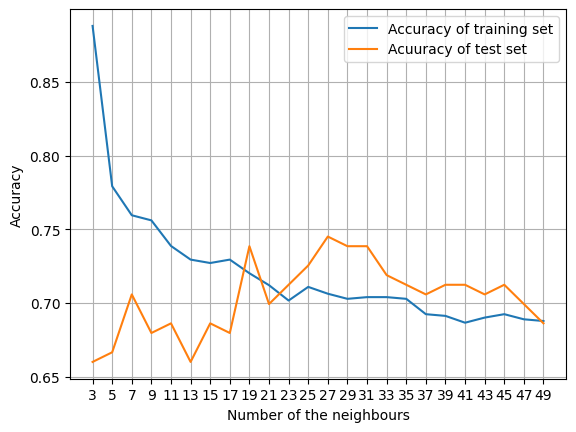

In [23]:
model,k,X_train,X_test,Y_train,Y_test,Y_prediction = knn(X=X,Y=Y,k=50)

[[56 18]
 [21 58]] 
------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        74
           1       0.76      0.73      0.75        79

    accuracy                           0.75       153
   macro avg       0.75      0.75      0.75       153
weighted avg       0.75      0.75      0.75       153
 
-------------------------------------------------------------------------------



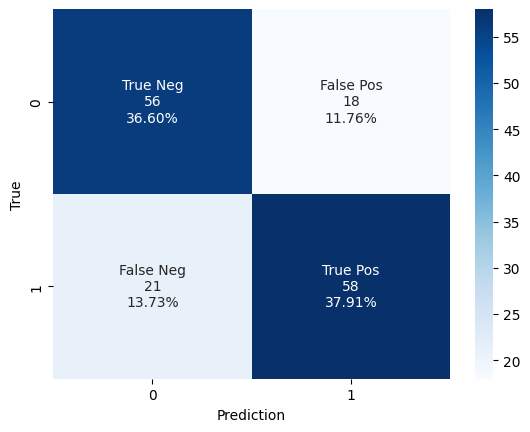

In [24]:
confusion_evaluation(Y_test=Y_test,Y_prediction=Y_prediction)

In [25]:
folds_evaluation(X=X_train,Y=Y_train,folds_number=20)

The Accuracy for the fold 1 is equal to : 0.7045454545454546
------------------------------------------------------------------------------
The Accuracy for the fold 2 is equal to : 0.7272727272727273
------------------------------------------------------------------------------
The Accuracy for the fold 3 is equal to : 0.7045454545454546
------------------------------------------------------------------------------
The Accuracy for the fold 4 is equal to : 0.5909090909090909
------------------------------------------------------------------------------
The Accuracy for the fold 5 is equal to : 0.6818181818181818
------------------------------------------------------------------------------
The Accuracy for the fold 6 is equal to : 0.6976744186046512
------------------------------------------------------------------------------
The Accuracy for the fold 7 is equal to : 0.6976744186046512
------------------------------------------------------------------------------
The Accuracy for the

# Enhanced Logestic Regression Model : 

In [26]:
model,Y_test,Y_prediction = improved_logestic_model(X=X,Y=Y)

The accuracy score for the solver "saga" : 
 
for the c = 0.1 : the accuracy is equal to : 0.8562091503267973
for the c = 0.05 : the accuracy is equal to : 0.8496732026143791
for the c = 0.01 : the accuracy is equal to : 0.8496732026143791
for the c = 0.001 : the accuracy is equal to : 0.869281045751634
for the c = 0.0001 : the accuracy is equal to : 0.5359477124183006
--------------------------------------------------------------------------------------------------------------------------------------------------------
The accuracy score for the solver "sag" : 
 
for the c = 0.1 : the accuracy is equal to : 0.8562091503267973
for the c = 0.05 : the accuracy is equal to : 0.8496732026143791
for the c = 0.01 : the accuracy is equal to : 0.8496732026143791
for the c = 0.001 : the accuracy is equal to : 0.869281045751634
for the c = 0.0001 : the accuracy is equal to : 0.5359477124183006
--------------------------------------------------------------------------------------------------------

[[68  6]
 [14 65]] 
------------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        74
           1       0.92      0.82      0.87        79

    accuracy                           0.87       153
   macro avg       0.87      0.87      0.87       153
weighted avg       0.87      0.87      0.87       153
 
-------------------------------------------------------------------------------



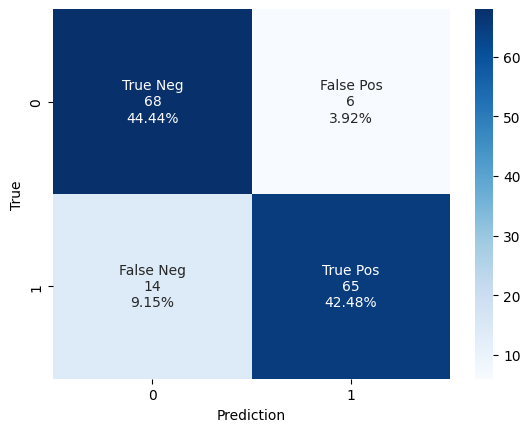

In [27]:
confusion_evaluation(Y_test=Y_test,Y_prediction=Y_prediction)